<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#Task-11" data-toc-modified-id="Task-11-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Task-11</a></span></li></ul></li></ul></div>

# ISE 291 Term Project 

Group Number = 90  

Group Members:            

Names                                Student IDs

Yousef Al Ethan            --           201941350 

Abdullah Alshehri           --           201948570

In [30]:
a= [1,2,3,2,1]
ok = True
print(len(a))
for i in range(len(a)):
    if(a[i]==a[-i-1] and ok ):
        print()
    else:
        ok = False
        break 
if(ok):
    print("everything is ok ")
else: 
    print("not ok @! ")

20

not ok @! 


## Task-1

In [3]:
#A
#1. Reading & displaying the data 
import pandas as pd
df = pd.read_csv('Group_90_A.csv', delimiter = ',')
display(df)

# datatypes in python
display(df.info())

# To check the number of classifications in some columns
unique=df['Type'].unique().tolist()
print(f'Type {unique}')
unique=df['Class'].unique().tolist()
print(f'Class {unique}')
unique=df['Location'].unique().tolist()
print(f'Location {unique}')
unique=df['Shape'].unique().tolist()
print(f'Shape {unique}')

# To change land to open land in the Type column
Type_mapping = {'land':'open land', 
               'open land':'open land', 
               'duplex':'duplex','flat':'flat','villa':'villa'}
df['Type'] = df['Type'].map(Type_mapping)
display(df)
uniqueType=df['Type'].unique().tolist()
print(uniqueType)

# resolving inconsistency
df["Proximity"]=df["Proximity"].apply(lambda x: int(x.replace("mts","")))
display(df.info())

# resolving inconsistency and fill the NaN
seleted_rows = df['Type']=='open land'
display(df.loc[seleted_rows,:])
df.loc[seleted_rows,["Built",'Renovate']]=df.loc[seleted_rows,["Built",'Renovate']].applymap(lambda x:0)
display(df)
display(df.info())

# since the Contour is applicable to the open land only, the others should be (NA) a short cut for not applicable
seleted_rows = df['Type']!='open land'
display(df.loc[seleted_rows,:])
df.loc[seleted_rows,'Contour']=df.loc[seleted_rows,'Contour'].apply(lambda x:'NA')

display(df)

# since the Garage is not applicable to the open land, it should be (NA) a short cut for not applicable
seleted_rows = df['Type']=='open land'
display(df.loc[seleted_rows,:])
df.loc[seleted_rows,'Garage']=df.loc[seleted_rows,'Garage'].apply(lambda x:'NA')

# since the Garage is alwayes (yes) to the villa, it should be (Yes)
seleted_rows = df['Type']=='villa'
display(df.loc[seleted_rows,:])
df.loc[seleted_rows,'Garage']=df.loc[seleted_rows,'Garage'].apply(lambda x:'Yes')
display(df)

# since the Swimming is applicable to the villa, the others should be (NA) a short cut for not applicable
seleted_rows = df['Type']!='villa'
display(df.loc[seleted_rows,:])
df.loc[seleted_rows,'Swimming']=df.loc[seleted_rows,'Swimming'].apply(lambda x:'NA')

display(df)

,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NaN,No,NaN
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NaN,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NaN,Yes,NaN
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,1975,NaN,alley,77,2,9,F,NaN,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051mts,6,0.089670,1992,0.0,highway,65,1,4,NaN,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NaN,No,NaN
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,1959,NaN,street,96,3,4,F,NaN,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NaN,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NaN,No,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sale-Price      3000 non-null   float64
 1   Purchase-Date   3000 non-null   object 
 2   Purchase-Price  3000 non-null   float64
 3   Type            3000 non-null   object 
 4   Class           3000 non-null   object 
 5   Location        3000 non-null   object 
 6   Shape           3000 non-null   object 
 7   U-Index         3000 non-null   int64  
 8   Proximity       3000 non-null   object 
 9   N-Rank          3000 non-null   int64  
 10  P-Chance        3000 non-null   float64
 11  Built           3000 non-null   int64  
 12  Renovate        2762 non-null   float64
 13  Access          3000 non-null   object 
 14  Crime-Rate      3000 non-null   int64  
 15  C-Rating        3000 non-null   int64  
 16  Gov-Index       3000 non-null   int64  
 17  Contour         767 non-null    o

None

Type ['flat', 'villa', 'duplex', 'open land', 'land']
Class ['residential', 'commercial', 'industrial']
Location ['Center', 'Outskirts', 'Border']
Shape ['rectangle', 'trapezoid', 'irregular']


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NaN,No,NaN
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NaN,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NaN,Yes,NaN
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,1975,NaN,alley,77,2,9,F,NaN,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051mts,6,0.089670,1992,0.0,highway,65,1,4,NaN,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NaN,No,NaN
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,1959,NaN,street,96,3,4,F,NaN,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NaN,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NaN,No,NaN


['flat', 'villa', 'duplex', 'open land']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sale-Price      3000 non-null   float64
 1   Purchase-Date   3000 non-null   object 
 2   Purchase-Price  3000 non-null   float64
 3   Type            3000 non-null   object 
 4   Class           3000 non-null   object 
 5   Location        3000 non-null   object 
 6   Shape           3000 non-null   object 
 7   U-Index         3000 non-null   int64  
 8   Proximity       3000 non-null   int64  
 9   N-Rank          3000 non-null   int64  
 10  P-Chance        3000 non-null   float64
 11  Built           3000 non-null   int64  
 12  Renovate        2762 non-null   float64
 13  Access          3000 non-null   object 
 14  Crime-Rate      3000 non-null   int64  
 15  C-Rating        3000 non-null   int64  
 16  Gov-Index       3000 non-null   int64

None

,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,1975,NaN,alley,77,2,9,F,NaN,NaN
9,11447.7,August-2001,5953.7,open land,residential,Outskirts,rectangle,2,70327,5,0.228536,2000,NaN,highway,68,1,6,F,NaN,NaN
12,11269.9,October-2006,4854.4,open land,industrial,Border,irregular,5,28106,3,0.463400,1998,0.0,street,97,2,1,F,NaN,NaN
15,11134.2,Oct-1971,3451.9,open land,commercial,Border,rectangle,4,32642,9,0.735878,1965,0.0,highway,37,5,1,F,NaN,NaN
24,11340.2,Jan-2006,1702.9,open land,industrial,Center,rectangle,1,15576,4,0.042003,1993,0.0,street,69,1,5,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,11247.1,November-1989,6291.1,open land,residential,Border,irregular,3,35978,5,0.320881,1980,0.0,street,24,4,8,C,NaN,NaN
2979,12128.5,January-2007,9103.4,open land,commercial,Border,trapezoid,4,31182,10,0.037694,1989,0.0,highway,55,5,8,F,NaN,NaN
2985,12068.8,November-2002,10507.0,open land,industrial,Border,trapezoid,4,26681,5,0.627631,1999,0.0,highway,40,3,8,C,NaN,NaN
2992,12686.2,March-86,9194.0,open land,commercial,Center,trapezoid,5,2387,8,0.803879,1977,NaN,street,98,1,1,F,NaN,NaN


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NaN,No,NaN
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NaN,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NaN,Yes,NaN
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,0,0.0,alley,77,2,9,F,NaN,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051,6,0.089670,1992,0.0,highway,65,1,4,NaN,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NaN,No,NaN
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,0,0.0,street,96,3,4,F,NaN,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NaN,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NaN,No,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sale-Price      3000 non-null   float64
 1   Purchase-Date   3000 non-null   object 
 2   Purchase-Price  3000 non-null   float64
 3   Type            3000 non-null   object 
 4   Class           3000 non-null   object 
 5   Location        3000 non-null   object 
 6   Shape           3000 non-null   object 
 7   U-Index         3000 non-null   int64  
 8   Proximity       3000 non-null   int64  
 9   N-Rank          3000 non-null   int64  
 10  P-Chance        3000 non-null   float64
 11  Built           3000 non-null   int64  
 12  Renovate        3000 non-null   float64
 13  Access          3000 non-null   object 
 14  Crime-Rate      3000 non-null   int64  
 15  C-Rating        3000 non-null   int64  
 16  Gov-Index       3000 non-null   int64  
 17  Contour         767 non-null    o

None

,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NaN,No,NaN
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NaN,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NaN,Yes,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051,6,0.089670,1992,0.0,highway,65,1,4,NaN,Yes,NaN
5,9941.5,October-1996,4366.6,duplex,commercial,Outskirts,rectangle,2,52068,7,0.087274,1984,1994.0,highway,69,2,10,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,10649.9,October-1985,7702.1,flat,commercial,Center,irregular,2,8120,8,0.583463,1971,1981.0,street,25,2,9,NaN,Yes,NaN
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NaN,No,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NaN,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NaN,No,NaN


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NA,No,NaN
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NA,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NA,Yes,NaN
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,0,0.0,alley,77,2,9,F,NaN,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051,6,0.089670,1992,0.0,highway,65,1,4,NA,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NA,No,NaN
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,0,0.0,street,96,3,4,F,NaN,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NA,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NA,No,NaN


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,0,0.0,alley,77,2,9,F,NaN,NaN
9,11447.7,August-2001,5953.7,open land,residential,Outskirts,rectangle,2,70327,5,0.228536,0,0.0,highway,68,1,6,F,NaN,NaN
12,11269.9,October-2006,4854.4,open land,industrial,Border,irregular,5,28106,3,0.463400,0,0.0,street,97,2,1,F,NaN,NaN
15,11134.2,Oct-1971,3451.9,open land,commercial,Border,rectangle,4,32642,9,0.735878,0,0.0,highway,37,5,1,F,NaN,NaN
24,11340.2,Jan-2006,1702.9,open land,industrial,Center,rectangle,1,15576,4,0.042003,0,0.0,street,69,1,5,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,11247.1,November-1989,6291.1,open land,residential,Border,irregular,3,35978,5,0.320881,0,0.0,street,24,4,8,C,NaN,NaN
2979,12128.5,January-2007,9103.4,open land,commercial,Border,trapezoid,4,31182,10,0.037694,0,0.0,highway,55,5,8,F,NaN,NaN
2985,12068.8,November-2002,10507.0,open land,industrial,Border,trapezoid,4,26681,5,0.627631,0,0.0,highway,40,3,8,C,NaN,NaN
2992,12686.2,March-86,9194.0,open land,commercial,Center,trapezoid,5,2387,8,0.803879,0,0.0,street,98,1,1,F,NaN,NaN


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NA,Yes,No
6,3890.3,May-1973,6660.2,villa,residential,Border,rectangle,1,31149,9,0.275595,1957,1965.0,street,27,4,1,NA,Yes,Yes
7,3526.6,Nov-1997,1365.5,villa,residential,Outskirts,trapezoid,1,55287,4,0.502283,1991,0.0,highway,69,2,10,NA,Yes,No
13,4234.3,July-84,8594.4,villa,residential,Center,irregular,5,15932,6,0.754565,1981,0.0,alley,92,1,6,NA,Yes,No
16,3976.6,November-2009,4637.7,villa,residential,Outskirts,rectangle,4,76497,5,0.821624,1997,2007.0,highway,61,1,5,NA,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,3466.4,September-1995,1851.1,villa,residential,Border,irregular,4,34663,1,0.541270,1984,1992.0,highway,38,4,7,NA,Yes,Yes
2983,4117.3,May-09,3790.7,villa,residential,Center,irregular,4,11212,1,0.425009,1996,2006.0,alley,47,1,8,NA,Yes,Yes
2984,11582.5,April-1983,1986.1,villa,residential,Center,rectangle,2,4693,2,0.367895,1965,1975.0,alley,69,2,6,NA,Yes,Yes
2987,11743.3,April-1993,4550.1,villa,residential,Border,trapezoid,1,23395,8,0.046878,1984,0.0,street,2,4,5,NA,Yes,No


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NA,No,NaN
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NA,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NA,Yes,NaN
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,0,0.0,alley,77,2,9,F,NA,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051,6,0.089670,1992,0.0,highway,65,1,4,NA,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NA,No,NaN
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,0,0.0,street,96,3,4,F,NA,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NA,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NA,No,NaN


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NA,No,NaN
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NA,Yes,NaN
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,0,0.0,alley,77,2,9,F,NA,NaN
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051,6,0.089670,1992,0.0,highway,65,1,4,NA,Yes,NaN
5,9941.5,October-1996,4366.6,duplex,commercial,Outskirts,rectangle,2,52068,7,0.087274,1984,1994.0,highway,69,2,10,NA,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NA,No,NaN
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,0,0.0,street,96,3,4,F,NA,NaN
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NA,Yes,NaN
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NA,No,NaN


,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
0,10204.5,July-1973,1224.0,flat,residential,Center,rectangle,3,9703,6,0.033697,1972,0.0,alley,27,4,10,NA,No,NA
1,3856.4,June-1985,3134.6,villa,residential,Outskirts,trapezoid,5,65324,4,0.119683,1975,1986.0,highway,35,3,7,NA,Yes,No
2,10558.2,January-1978,1673.0,duplex,commercial,Border,trapezoid,5,26262,6,0.576134,1970,0.0,street,24,2,7,NA,Yes,NA
3,11524.2,August-76,3527.8,open land,industrial,Center,rectangle,3,20971,3,0.628718,0,0.0,alley,77,2,9,F,NA,NA
4,10480.4,March-2000,6862.8,duplex,residential,Border,rectangle,2,34051,6,0.089670,1992,0.0,highway,65,1,4,NA,Yes,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11497.7,February-2004,5372.9,duplex,commercial,Center,trapezoid,1,5378,1,0.958545,1987,1995.0,street,87,1,1,NA,No,NA
2996,11753.1,May-1978,10611.0,open land,industrial,Border,rectangle,1,31297,8,0.657999,0,0.0,street,96,3,4,F,NA,NA
2997,11725.9,March-2001,8932.5,flat,commercial,Center,rectangle,5,5807,7,0.718650,2000,0.0,street,82,5,9,NA,Yes,NA
2998,10984.6,October-1980,1194.5,duplex,residential,Center,trapezoid,4,5252,9,0.238575,1963,1971.0,street,14,2,9,NA,No,NA


## Task-2

,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming
2428,4120.0,June-1978,10907.9,villa,residential,Border,rectangle,3,20998,6,0.549952,1967,1975,highway,98,2,5,NaN,Yes,Yes
4590,10852.0,September-2000,5063.0,duplex,residential,Border,irregular,4,32566,1,0.243600,1999,0,street,53,5,5,NaN,Yes,NaN
969,19372.4,April-1970,11397.8,open land,industrial,Center,irregular,2,6778,9,0.635880,1968,0,alley,93,1,2,F,NaN,NaN
3583,11161.5,December-2006,6766.8,duplex,commercial,Border,trapezoid,2,35107,3,0.386373,2002,0,street,12,2,6,NaN,No,NaN
2213,11646.6,August-1972,11183.9,flat,commercial,Center,trapezoid,2,9332,1,0.806856,1954,1964,street,66,1,6,NaN,Yes,NaN


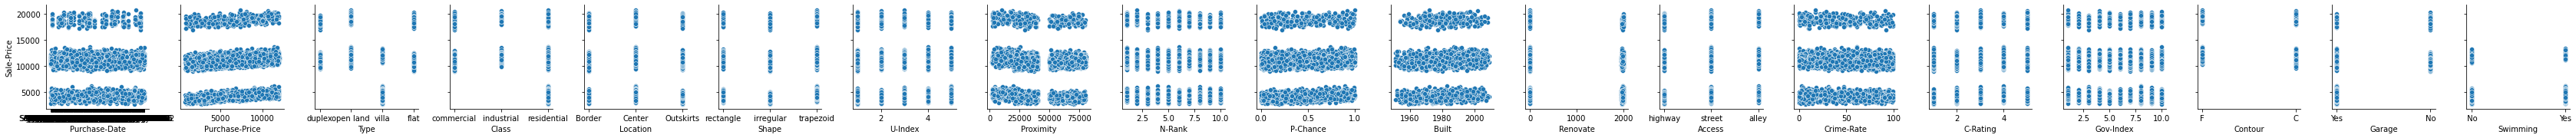

In [4]:
import pandas as pd

df = pd.read_csv('Group_90_B.csv', delimiter = ',')

display(df.sample(5))

from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(
    df,
    x_vars=["Purchase-Date", "Purchase-Price", "Type","Class", "Location", "Shape","U-Index", "Proximity", "N-Rank","P-Chance", "Built", "Renovate", "Access", "Crime-Rate", "C-Rating", "Gov-Index","Contour", "Garage", "Swimming"],
    y_vars=["Sale-Price"],
)
plt.show()
a= [1,2,3,2,1] 
for(i=0 ; of,vdflv)
    if(a[i]==a[-i-1])
        ok 
    else
        no

## Task-3

In [5]:
import numpy as np
import pandas as pd
df = pd.read_csv('group90/Group_90_B.csv', delimiter = ',')
num_columns = df.select_dtypes(exclude='object').columns
corr = df[num_columns].corr().abs()
display(corr)
print("top 3 numerical variables that are strongly related to the output variable are: Renovate,Purchase-Price and Proximity")
print() 
print("Bottom 3 numerical variables that are strongly related to the output variable are: N-Rank,Crime-Rate and C-Rating. ")

,Sale-Price,Purchase-Price,U-Index,Proximity,N-Rank,P-Chance,Built,Renovate,Crime-Rate,C-Rating,Gov-Index
Sale-Price,1.000000,0.090529,0.041341,0.068229,0.008185,0.036222,0.037347,0.152200,0.009409,0.017557,0.026592
Purchase-Price,0.090529,1.000000,0.013656,0.026463,0.020098,0.002946,0.007636,0.034855,0.018606,0.029673,0.011313
U-Index,0.041341,0.013656,1.000000,0.025268,0.001513,0.009767,0.001468,0.022669,0.001866,0.015171,0.012230
Proximity,0.068229,0.026463,0.025268,1.000000,0.000976,0.006400,0.021345,0.022369,0.013057,0.026335,0.012357
N-Rank,0.008185,0.020098,0.001513,0.000976,1.000000,0.016164,0.003205,0.001129,0.042534,0.022747,0.004109
P-Chance,0.036222,0.002946,0.009767,0.006400,0.016164,1.000000,0.007107,0.017291,0.013237,0.007169,0.003261
Built,0.037347,0.007636,0.001468,0.021345,0.003205,0.007107,1.000000,0.298921,0.008523,0.033444,0.006104
Renovate,0.152200,0.034855,0.022669,0.022369,0.001129,0.017291,0.298921,1.000000,0.009769,0.012516,0.009400
Crime-Rate,0.009409,0.018606,0.001866,0.013057,0.042534,0.013237,0.008523,0.009769,1.000000,0.010251,0.009543
C-Rating,0.017557,0.029673,0.015171,0.026335,0.022747,0.007169,0.033444,0.012516,0.010251,1.000000,0.007620


top 3 numerical variables that are strongly related to the output variable are: Renovate,Purchase-Price and Proximity

Bottom 3 numerical variables that are strongly related to the output variable are: N-Rank,Crime-Rate and C-Rating. 


## Task-4

,Sale-Price,Purchase-Date,Purchase-Price,Type,Class,Location,Shape,U-Index,Proximity,N-Rank,...,Renovate,Access,Crime-Rate,C-Rating,Gov-Index,Contour,Garage,Swimming,pca1,pca2
0,10722.9,March-2001,9884.1,duplex,commercial,Border,rectangle,4,32886,8,...,0,highway,77,1,8,NaN,Yes,NaN,-3594.027177,-3477.546817
1,11494.5,September-1971,1418.6,open land,commercial,Center,irregular,5,14034,9,...,0,street,17,4,2,F,NaN,NaN,-22478.503028,4914.539189
2,11418.5,September-2008,6854.9,open land,industrial,Outskirts,rectangle,4,63431,2,...,0,highway,82,1,5,F,NaN,NaN,26939.059024,-330.535235
3,11298.3,May-2005,5475.0,duplex,residential,Outskirts,trapezoid,4,56179,7,...,1996,highway,8,1,8,NaN,Yes,NaN,19683.680237,999.170701
4,4282.1,June-1987,6368.7,villa,residential,Outskirts,trapezoid,5,65236,7,...,1981,highway,85,3,2,NaN,Yes,No,28744.039871,140.679727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10690.7,July-2007,4054.8,flat,residential,Outskirts,rectangle,5,68491,1,...,0,highway,54,1,9,NaN,No,NaN,31988.228360,2488.928309
4996,9663.1,August-1974,868.6,duplex,commercial,Border,irregular,3,24499,4,...,0,highway,4,5,6,NaN,Yes,NaN,-12015.705120,5504.938507
4997,4993.7,August-1978,9568.2,villa,residential,Center,rectangle,1,10427,1,...,1972,street,45,5,8,NaN,Yes,Yes,-26052.208367,-3270.267185
4998,3918.8,August-1993,3559.1,villa,residential,Border,trapezoid,2,26572,6,...,1990,street,90,1,9,NaN,Yes,Yes,-9930.474298,2800.595265


<Figure size 432x288 with 0 Axes>

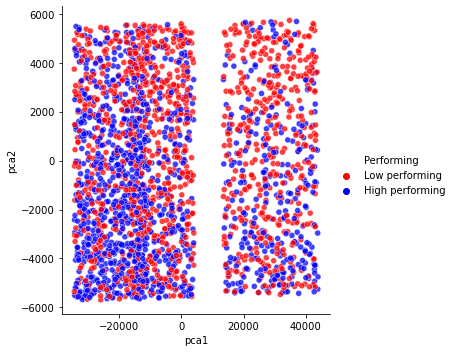

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
num_columns = df.select_dtypes(exclude='object').columns
pca_input_columns=num_columns.drop(['Sale-Price'])
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(df[pca_input_columns]) 
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]
display(df)
#using interquartile to seperate the high and low (high is greater than Q3 and Low is Lower than Q1)
Q3, Q1 = np.percentile(df['Sale-Price'], [75,25])
df['Performing'] = df['Sale-Price'].apply(lambda  x: 'High performing' if x>Q3 else 'Low performing' if x<Q1 else 'Average performing')
plt.figure()
relevant_data = (df['Performing'] == 'Low performing') | (df['Performing'] == 'High performing')
sns.relplot(x='pca1',y='pca2',
            hue='Performing', palette=['r','b'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df[relevant_data])

#After doin the analysis , removing pca1 and pca2 because we don't need it anymore 
df.drop(['pca1','pca2'],axis=1,inplace=True)



#Justification 
##The below plot is showing excellent seperation 

## Task-5

## Task-6

## Task-7

## Task-8

## Task-9

## Task-10

## Task-11